# Decision Trees and Ensemble methods

## Oluwatosin Adewale
## IE 7860



## Loading required modules and dataset

In [1]:
# Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import lime
import lime.lime_tabular


In [2]:
# Loading the data
wine = pd.read_csv('winequality-white.csv', delimiter=';')


In [51]:
wine.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.387746,0.165005,0.224690,2.934995,0.030479,13.317521,17.647354,0.011741,0.355755,0.221657,0.582206,6
1,1.348707,0.175167,0.216940,0.969035,0.032161,6.308137,15.680256,0.011741,0.357207,0.230003,0.583393,6
2,1.440195,0.168507,0.239155,2.130836,0.032563,10.339235,13.547378,0.011741,0.357035,0.219421,0.584412,6
3,1.398019,0.149731,0.208816,2.327330,0.035531,13.679493,18.397843,0.011741,0.356719,0.209812,0.584089,6
4,1.398019,0.149731,0.208816,2.327330,0.035531,13.679493,18.397843,0.011741,0.356719,0.209812,0.584089,6
5,1.440195,0.168507,0.239155,2.130836,0.032563,10.339235,13.547378,0.011741,0.357035,0.219421,0.584412,6
6,1.342695,0.181399,0.133157,2.144204,0.030479,10.339235,15.901787,0.011741,0.356672,0.225945,0.583574,6
7,1.387746,0.165005,0.224690,2.934995,0.030479,13.317521,17.647354,0.011741,0.355755,0.221657,0.582206,6
8,1.348707,0.175167,0.216940,0.969035,0.032161,6.308137,15.680256,0.011741,0.357207,0.230003,0.583393,6
9,1.440195,0.145569,0.249176,0.928722,0.030039,9.897388,15.511515,0.011741,0.356857,0.221657,0.585689,6


In [3]:
# Understanding the data
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [4]:
wine.isnull().sum()                #no null values
wine['quality'].value_counts()


quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

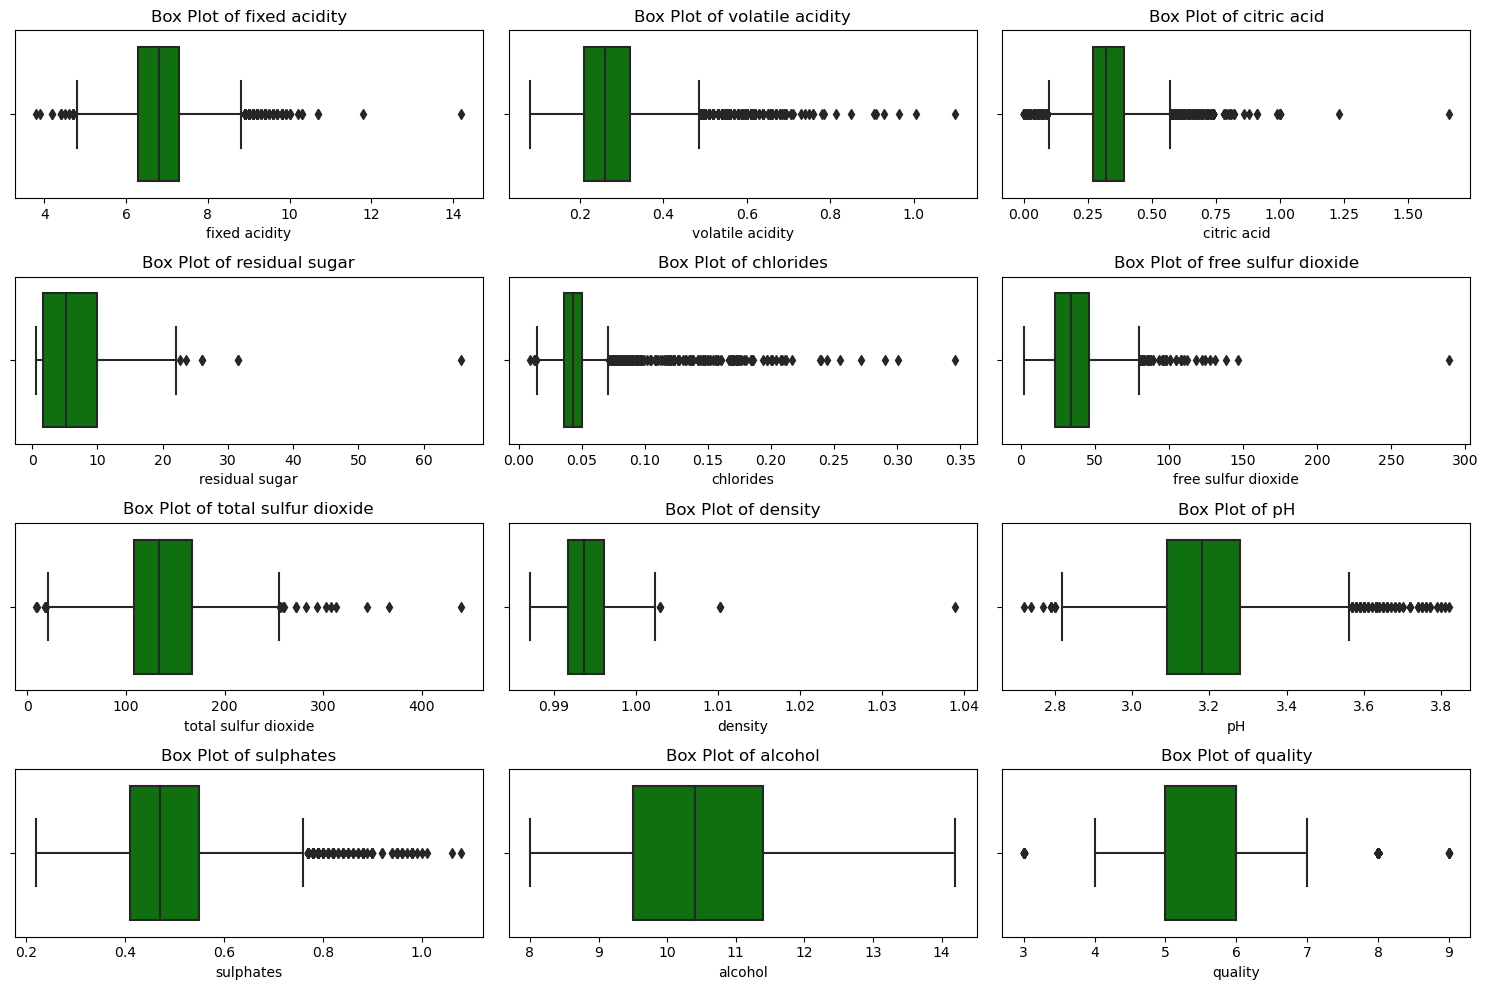

In [5]:
# using box plots to identify outliers for each feature 
plt.figure(figsize=(15, 10))
for i, column in enumerate(wine.columns):
    plt.subplot(4, 3, i+1)  
    sns.boxplot(x=wine[column], color='green')
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


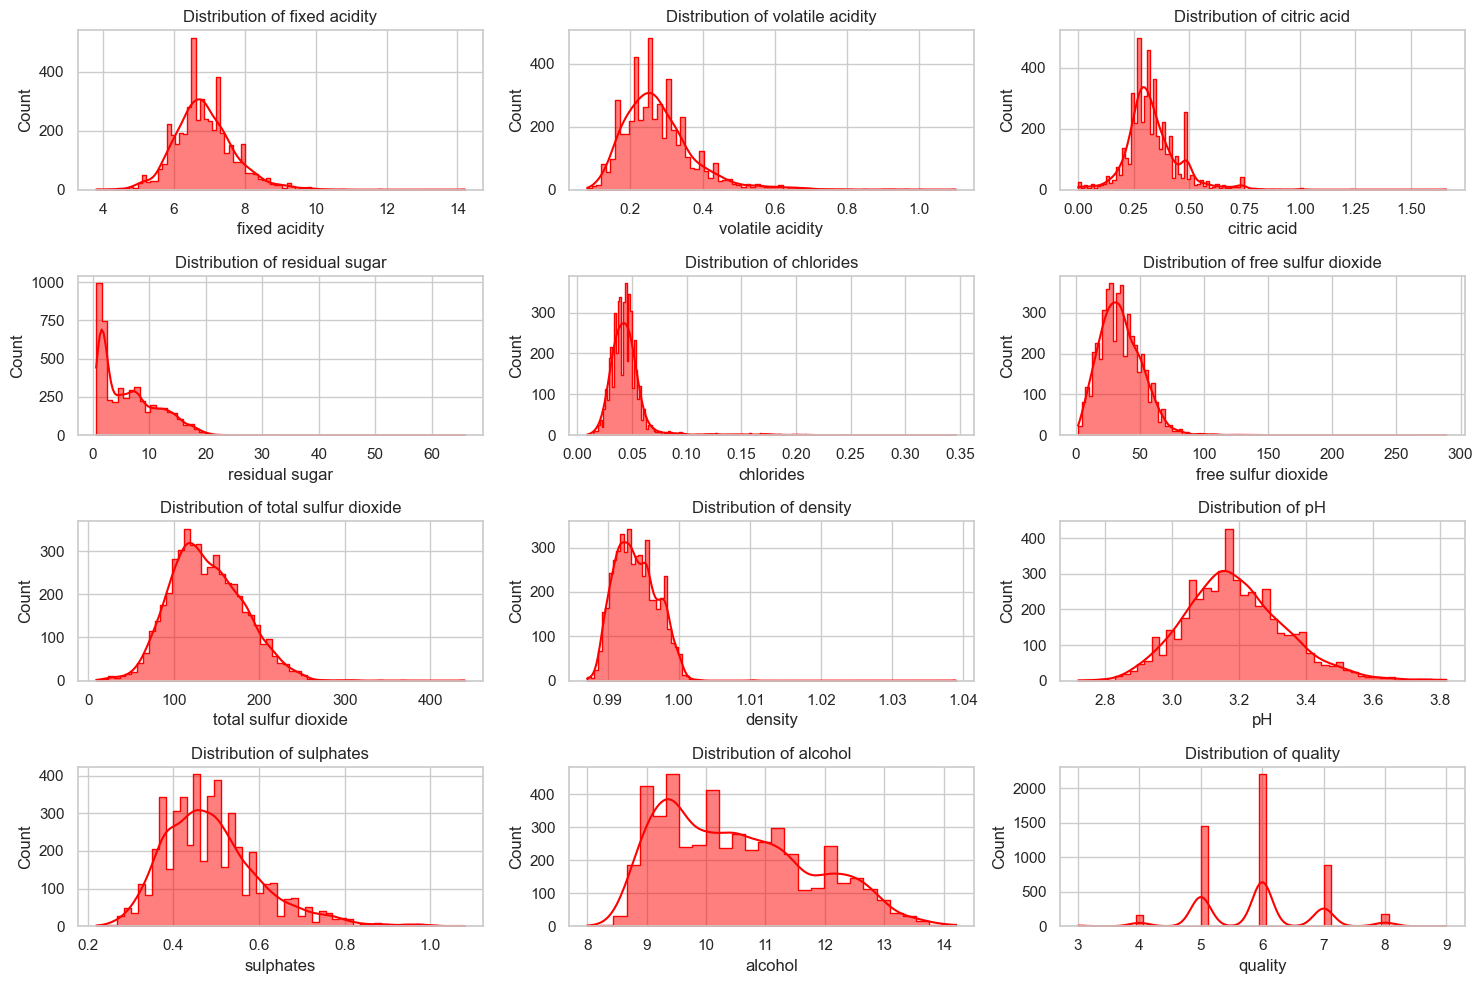

In [6]:
# histogram to visualize the distribution 
# Plot aesthetics
sns.set(style="whitegrid")

# Histograms for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(wine.columns):
    plt.subplot(4, 3, i+1)  
    sns.histplot(wine[column], kde=True, element='step', color='red')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


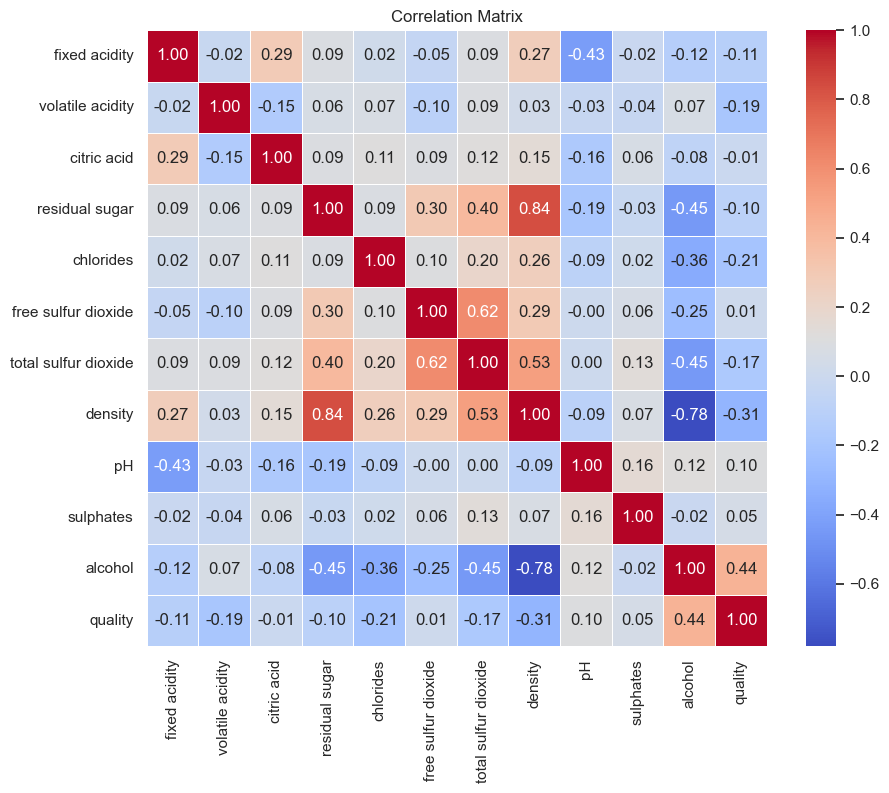

In [7]:
# correlation matrix to explore existing relationships
# Correlation matrix
correlate = wine.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlate, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


Interpreting the visualizations. 

The box plots reveal a number of outliers in several features particularly Residual sugar, Chlorides, Free and Total sulfur oxide. There are also some outliers at the higher quality ratings, possibly indicating that few of the wines have sucha good quality rating.

For the Correlation Matrix:
* Alcohol: Positively correlated with quality, suggesting that higher alcohol content may be associated with higher quality ratings.
* Density: Shows a strong negative correlation with alcohol, which makes sense as alcohol has a lower density than water.
* Free Sulfur Dioxide and Total Sulfur Dioxide: Both have a strong positive correlation with each other, which is expected as they are related measures.
* Volatile Acidity: Has a negative correlation with quality, implying that lower volatile acidity might be associated with higher quality wines.
* Citric Acid and pH: Have a negative correlation, suggesting that higher levels of citric acid (which is an acid) results in lower (more acidic) pH values.

No particular feature shows a very strong correlation with quality, so wine quality is probably influenced by a combination of features.

In [8]:
## Data preprocessing
#Dealing with outliers
for column in wine.columns:
    percentiles = wine[column].quantile([0.05, 0.95]).values
    wine[column] = np.clip(wine[column], percentiles[0], percentiles[1])


In [9]:
# Training test split
X = wine.drop('quality', axis=1)  # Features
y = wine['quality']  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Adding transformations to deal with skewed data

# Apply Box-Cox transformation to each column except 'quality' which is the target
for column in wine.columns[:-1]:  # Exclude the target variable
    wine[column], _ = boxcox(wine[column] + 1)  # Adding 1 to avoid issues with 0 values


## Establishing model baselines - No feature engineering

In [11]:
## Establishing the baseline models

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the target variable to encode the labels
y_encoded = label_encoder.fit_transform(wine['quality'])

# Split the data again with the encoded labels
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initializing the 3 models (Single decision tree, XGBoost and bagging model)
dt_clf = DecisionTreeClassifier(random_state=42)
bagging_clf = BaggingClassifier(random_state=42)
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train the models
dt_clf.fit(X_train, y_train)
bagging_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)

# Predict on the test set
dt_pred = dt_clf.predict(X_test)
bagging_pred = bagging_clf.predict(X_test)
xgb_pred = xgb_clf.predict(X_test)

# Evaluate the models
dt_accuracy = accuracy_score(y_test, dt_pred)
bagging_accuracy = accuracy_score(y_test, bagging_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Print the accuracies
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Bagging Classifier Accuracy: {bagging_accuracy:.4f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")


Decision Tree Accuracy: 0.6582
Bagging Classifier Accuracy: 0.6990
XGBoost Accuracy: 0.7102


In [41]:
## Random Forest model
# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on your training data
rf_clf.fit(X_train, y_train)

# Predict on the test data
rf_pred = rf_clf.predict(X_test)

# Calculate the accuracy of the model on the test data
rf_accuracy = accuracy_score(y_test, rf_pred)

# Output the accuracy of the Random Forest model
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


Random Forest Accuracy: 0.7378


For a baseline, the decision tree has 65% accuraccy, the bagging classifier has a 69% accuracy and the XGBoost model has a 71% accuracy and the random forest model has a 73% making it the best performing model of the three with no feature engineeering. All susequent models will try to beat this baseline and improve on the model accuracy.

## Performing feature engineering to try to improve the models performance

In [13]:
# Feature Engineering
# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
selected_features = wine[['fixed acidity', 'volatile acidity']]
poly_features = poly.fit_transform(selected_features)
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(selected_features.columns))

# Concatenate the polynomial features with the original dataset
wine_enhanced = pd.concat([wine.drop(selected_features.columns, axis=1), poly_features_df], axis=1)

# Create interaction term
wine_enhanced['acid_sugar_interaction'] = wine['fixed acidity'] * wine['residual sugar']

# Data Splitting
X = wine_enhanced.drop('quality', axis=1)  # Features
y = wine['quality']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
## Decision Tree
# Decision Tree Model Training
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Decision Tree Model Evaluation
dt_pred = dt_clf.predict(X_test)
dt_accuracy_enhanced = accuracy_score(y_test, dt_pred)

# Output the Decision Tree accuracy
print(f"Enhanced Decision Tree Accuracy: {dt_accuracy_enhanced:.4f}")


Enhanced Decision Tree Accuracy: 0.6704


In [15]:
## Bagging Classifier
# Bagging Classifier Model Training
bagging_clf = BaggingClassifier(random_state=42)
bagging_clf.fit(X_train, y_train)

# Bagging Classifier Model Evaluation
bagging_pred = bagging_clf.predict(X_test)
bagging_accuracy_enhanced = accuracy_score(y_test, bagging_pred)

# Output the Bagging Classifier accuracy
print(f"Enhanced Bagging Classifier Accuracy: {bagging_accuracy_enhanced:.4f}")


Enhanced Bagging Classifier Accuracy: 0.7020


In [18]:
## XGBoost Model 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming 'wine' is your DataFrame and 'quality' is the target variable
X = wine.drop('quality', axis=1)  # Features
y = wine['quality']  # Target variable

# Encode the target variable with label encoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encode the full target array

# Split the data with the encoded target
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# XGBoost Model Training with correctly encoded labels
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train, y_train)  # Make sure to use the encoded labels here

# XGBoost Model Evaluation
xgb_pred = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)  # Use the encoded labels for evaluation

# Output the XGBoost accuracy with encoded labels
print(f"XGBoost Accuracy with Encoded Labels: {xgb_accuracy:.4f}")


XGBoost Accuracy with Encoded Labels: 0.7010


## Hyperparameter Tuning for improving model accuracy

In [19]:
# Hyperparameter tuning with grid search for Decision tree
from sklearn.model_selection import GridSearchCV

# Parameter grid for Decision Tree
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Grid Search model
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.6242894284150442


Feature: fixed acidity, Score: 0.07999
Feature: volatile acidity, Score: 0.12351
Feature: citric acid, Score: 0.08015
Feature: residual sugar, Score: 0.07952
Feature: chlorides, Score: 0.07859
Feature: free sulfur dioxide, Score: 0.09277
Feature: total sulfur dioxide, Score: 0.08020
Feature: density, Score: 0.00000
Feature: pH, Score: 0.07977
Feature: sulphates, Score: 0.07945
Feature: alcohol, Score: 0.22606


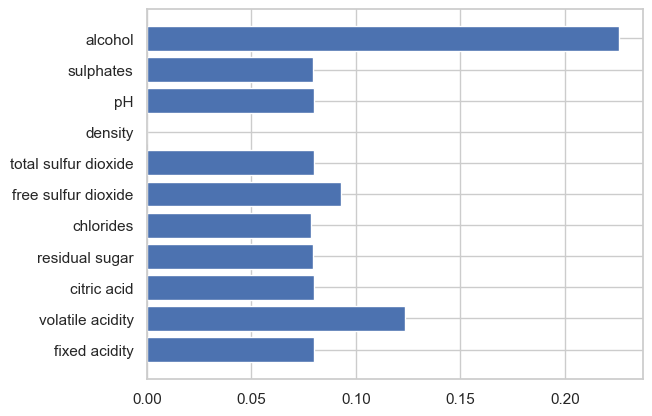

In [20]:
# Feature importances from XGBoost model
importance = xgb_clf.feature_importances_

# Summarize feature importance
for i,v in enumerate(importance):
    print(f'Feature: {X_train.columns[i]}, Score: {v:.5f}')

# Plot feature importance
plt.barh(X_train.columns, importance)
plt.show()


Feature: fixed acidity, Score: 0.06895
Feature: volatile acidity, Score: 0.11199
Feature: citric acid, Score: 0.10364
Feature: residual sugar, Score: 0.09193
Feature: chlorides, Score: 0.08013
Feature: free sulfur dioxide, Score: 0.10874
Feature: total sulfur dioxide, Score: 0.09732
Feature: density, Score: 0.00000
Feature: pH, Score: 0.08825
Feature: sulphates, Score: 0.08864
Feature: alcohol, Score: 0.16041


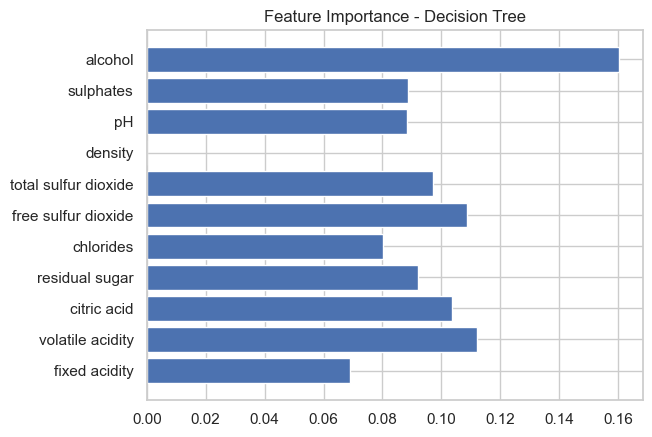

In [27]:
# Feature importances from the decision tree
dt_importance = dt_clf_best.feature_importances_

# Summarize feature importance
for i, importance in enumerate(dt_importance):
    print(f'Feature: {X_train.columns[i]}, Score: {importance:.5f}')

# Plot feature importance for the decision tree
plt.barh(X_train.columns, dt_importance)
plt.title('Feature Importance - Decision Tree')
plt.show()


Feature: alcohol, Score: 0.14605
Feature: volatile acidity, Score: 0.11103
Feature: free sulfur dioxide, Score: 0.10444
Feature: total sulfur dioxide, Score: 0.10223
Feature: chlorides, Score: 0.09467
Feature: residual sugar, Score: 0.09405
Feature: citric acid, Score: 0.09195
Feature: pH, Score: 0.09181
Feature: sulphates, Score: 0.08274
Feature: fixed acidity, Score: 0.08103
Feature: density, Score: 0.00000


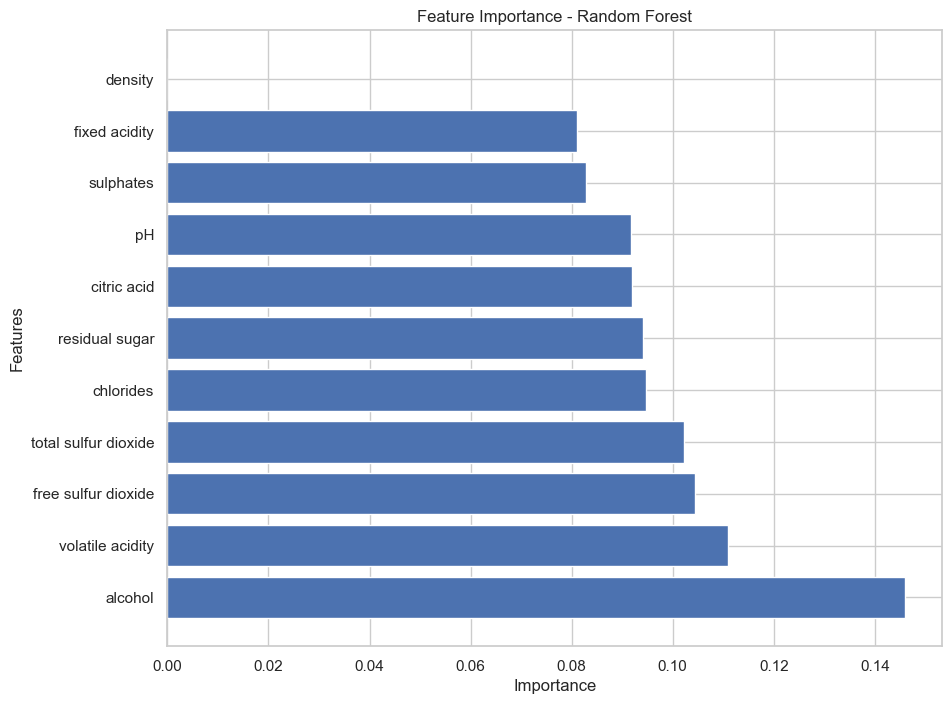

In [47]:
# Feature importance from Random Forest Model
# Get feature importances from the random forest model
rf_importances = rf_clf.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(rf_importances)[::-1]

# Summarize feature importance
for i in sorted_indices:
    print(f'Feature: {X_train.columns[i]}, Score: {rf_importances[i]:.5f}')

# Plot feature importance for the random forest model
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_indices)), rf_importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [X_train.columns[i] for i in sorted_indices])
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Analysis:

The grid search results indicate that for the Decision Tree, the best parameters found are a tree with no limit on the depth ('max_depth': None), and the smallest possible values for 'min_samples_leaf' and 'min_samples_split', which are 1 and 2 respectively. This suggests that a more complex model was favored by the grid search. The best cross-validation score achieved with these parameters is approximately 62.43%.

For the feature importance plot, the most influential features in predicting wine quality appear to be alcohol, volatile acidity, and free sulphur oxide across all three models. These features have the highest scores, suggesting they have the most impact on the model's decisions. I will be adding these features and the features with strong correlations based on the correlation matrix earlier as important features to retrain the models on. Another thing worthy of note is the importance of the density column. Each model consistently assigns it zero importance as a feature.

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree classifier with the best parameters
dt_clf_best = DecisionTreeClassifier(max_depth=None, 
                                     min_samples_leaf=1, 
                                     min_samples_split=2,
                                     random_state=42)

# Retrain the model on the entire training set
dt_clf_best.fit(X_train, y_train)

# Predict on the test set using the retrained model
dt_pred_best = dt_clf_best.predict(X_test)

# Calculate the accuracy of the model on the test set
dt_accuracy_best = accuracy_score(y_test, dt_pred_best)

# Output the accuracy of the retrained model
print(f"Retrained Decision Tree Accuracy: {dt_accuracy_best:.4f}")


Retrained Decision Tree Accuracy: 0.6653


## Retraining the models on the most important features based on correlation matrix and feature importance


In [31]:
### Most important features based on feature importance plot
important_features = ['alcohol','density', 'volatile acidity', 'free sulfur dioxide', 'citric acid', 'pH']
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

In [32]:
## Decision tree
# Decision Tree with most important features
dt_clf_important = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)
dt_clf_important.fit(X_train_important, y_train)
dt_pred_important = dt_clf_important.predict(X_test_important)
dt_accuracy_important = accuracy_score(y_test, dt_pred_important)
print(f"Decision Tree (important features) Accuracy: {dt_accuracy_important:.4f}")


Decision Tree (important features) Accuracy: 0.6714


In [33]:
## Bagging model
# Bagging Classifier with most important features
bagging_clf_important = BaggingClassifier(random_state=42)
bagging_clf_important.fit(X_train_important, y_train)
bagging_pred_important = bagging_clf_important.predict(X_test_important)
bagging_accuracy_important = accuracy_score(y_test, bagging_pred_important)
print(f"Bagging Classifier (important features) Accuracy: {bagging_accuracy_important:.4f}")


Bagging Classifier (important features) Accuracy: 0.6776


In [34]:
## XGBoost model
# XGBoost with most important features
xgb_clf_important = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf_important.fit(X_train_important, y_train)
xgb_pred_important = xgb_clf_important.predict(X_test_important)
xgb_accuracy_important = accuracy_score(y_test, xgb_pred_important)
print(f"XGBoost (important features) Accuracy: {xgb_accuracy_important:.4f}")

XGBoost (important features) Accuracy: 0.6837


In [35]:
## Testing a different ensemble method (ExtraTreesClassifier)

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# Initialize the ExtraTreesClassifier
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the classifier
et_clf.fit(X_train, y_train)

# Predict on the test set
et_pred = et_clf.predict(X_test)

# Calculate the accuracy
et_accuracy = accuracy_score(y_test, et_pred)

# Output the accuracy
print(f"ExtraTreesClassifier Accuracy: {et_accuracy:.4f}")


ExtraTreesClassifier Accuracy: 0.7327


## Evaluating best models performance metrics

In [45]:
## Random forest

# Performance metrics with Random Forest model predictions
rf_report = classification_report(y_test, et_pred)
rf_roc_auc = roc_auc_score(y_test, rf_clf.predict_proba(X_test), multi_class='ovo')

print(f"Random Forest Classification Report:\n{rf_report}")
print(f"Random Forest ROC-AUC Score: {rf_roc_auc:.4f}")


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       321
           1       0.68      0.77      0.72       432
           2       0.82      0.67      0.73       227

    accuracy                           0.73       980
   macro avg       0.75      0.72      0.73       980
weighted avg       0.74      0.73      0.73       980

Random Forest ROC-AUC Score: 0.8921


Analysis:

The Random Forest model displays robust predictive power, particularly for class 2 wines, which it identifies with high precision, suggesting clear defining characteristics for this category. While it effectively recognizes most class 1 wines, its lower precision points to some confusion with other classes. Its strong overall recall indicates a sensitivity to class labels, but with an ROC-AUC score of 0.8921, there is still potential to fine-tune its discrimination between classes.

In [43]:
## XGBoost

# Performance metrics with XGB model predictions
xgb_report = classification_report(y_test, et_pred)
xgb_roc_auc = roc_auc_score(y_test, xgb_clf.predict_proba(X_test), multi_class='ovo')

print(f"XGB Classification Report:\n{xgb_report}")
print(f"XGB ROC-AUC Score: {xgb_roc_auc:.4f}")


XGB Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       321
           1       0.68      0.77      0.72       432
           2       0.82      0.67      0.73       227

    accuracy                           0.73       980
   macro avg       0.75      0.72      0.73       980
weighted avg       0.74      0.73      0.73       980

XGB ROC-AUC Score: 0.8648


Analysis:

XGBoost parallels the performance of the Random Forest, indicating that both models interpret the data similarly despite their distinct learning algorithms. The slightly lower ROC-AUC score of 0.8648 may imply a bit more uncertainty in class discrimination. Like the Random Forest, XGBoost is also less precise with class 1 predictions, possibly due to overlapping features with other classes.

In [36]:
## Extra Trees
from sklearn.metrics import classification_report, roc_auc_score

# Performance metrics with ExtraTreesClassifier predictions
et_report = classification_report(y_test, et_pred)
et_roc_auc = roc_auc_score(y_test, et_clf.predict_proba(X_test), multi_class='ovo')

print(f"ExtraTreesClassifier Classification Report:\n{et_report}")
print(f"ExtraTreesClassifier ROC-AUC Score: {et_roc_auc:.4f}")


ExtraTreesClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       321
           1       0.68      0.77      0.72       432
           2       0.82      0.67      0.73       227

    accuracy                           0.73       980
   macro avg       0.75      0.72      0.73       980
weighted avg       0.74      0.73      0.73       980

ExtraTreesClassifier ROC-AUC Score: 0.9002


The model slightly edges out the other models with the highest ROC-AUC score of 0.9002, showing it performs really well at distinguishing between the existing classes. The similarity in precision and recall across all models, especially the high precision for class 2, suggests that the ExtraTrees model retains the predictive strengths of the other tree-based models while marginally improving class separation.

## Evaluating feature importance Using LIME for RF and XGBoost models

In [49]:
# Lime for XGBoost model

# Initialize the LIME explainer for tabular data
explainer_xgb = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,
    class_names=['Bad', 'Good'],  
    mode='classification'
)

# Explaining a prediction from the test set
i = 20 
exp_xgb = explainer_xgb.explain_instance(X_test.values[i], xgb_clf.predict_proba, num_features=10)

# Show the explanation
exp_xgb.show_in_notebook(show_table=True, show_all=True) 


Analysis of Results for the XGBoost model:

The bar chart shows the contributions of each feature to the predictive model’s decision, and the colors represent the class that each feature is pushing the prediction towards. For this instance, the prediction seems to be leaning towards the "Bad" class with a probability of 0.76.

Additional analysis:

* Alcohol (<= 0.58): This feature contributes most strongly to classifying the wine as "Bad". Typically, higher alcohol content is associated with better quality wines, so this particular instance having a low value might be unusual.
* Volatile Acidity (> 0.14): Higher levels of volatile acidity are often associated with poorer wine quality. This positively contributes to the "Bad" classification, which aligns with common knowledge about wine quality.
* pH (> 0.36): The pH is contributing slightly towards classifying the wine as "Good". The impact is relatively small compared to other features.
* Fixed Acidity, Citric Acid, and Chlorides: These are also contributing towards a "Bad" prediction, although their individual effects are not as strong as alcohol and volatile acidity.
* Residual Sugar (> 2.48): This is interesting as it's contributing towards "Good", which could be characteristic of certain wine types where a higher residual sugar content is desirable.
* Total Sulfur Dioxide and Free Sulfur Dioxide: Sulfur dioxide levels relate to the freshness and preservation of wine. The model seems to be interpreting the total sulfur dioxide level as slightly negative, while the free sulfur dioxide has a very small positive contribution towards "Good".

LIME is showing that for this particular selected instance, the relatively low alcohol content and the somewhat high level of volatile acidity are the main reasons for the model's "Bad" prediction, despite having characteristics that could be associated with both good and bad quality wines.

This local interpretation highlights that while certain features may generally indicate quality, each wine is a unique case, and the model is sensitive to the specific combination of feature values when making a prediction.

In [50]:
# LIME for RF model

# Initialize the LIME explainer for tabular data
explainer_rf = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,
    class_names=['Bad', 'Good'], 
    mode='classification'
)

# Explaining a prediction from the test set
exp_rf = explainer_rf.explain_instance(X_test.values[i], rf_clf.predict_proba, num_features=10)

# Show the explanation
exp_rf.show_in_notebook(show_table=True, show_all=False)


C:\Users\tosin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Analysis of Results for RF model:

Unlike the instance selected in the XGB model, in this case, the prediction is more uncertain, with a slight leaning towards "Bad" at 0.51 probability, and "Good" at 0.45 probability.

Additional Analysis:

* Alcohol (<= 0.58): The low alcohol content seems to be the strongest contributor to the "Bad" wine classification. However, since the influence is slightly less pronounced in this model, it may suggest a different internal weighting for this feature between the models.
* Volatile Acidity (0.15): Again, this feature impacts the prediction towards "Bad" but with a lower weight compared to the XGBoost model, indicating that volatile acidity might not be as critical a factor for the Random Forest model or that its effect is balanced by other features.
* pH (> 0.36): The pH level has a small positive impact towards "Good" quality, which is consistent with the XGBoost model's interpretation but with a reduced influence.
* Fixed Acidity, Citric Acid, Chlorides, Residual Sugar, Total Sulfur Dioxide, Free Sulfur Dioxide, and Sulphates: These features all have a minor influence on the prediction. Their contributions are minimal, suggesting that the model's decision is more heavily dependent on alcohol and volatile acidity for this particular instance. Notably, the Random Forest model seems to give much less importance to sulfur dioxide levels than the XGBoost model.

Overall, I would say that while there are similarities between the Random Forest and XGBoost interpretations, the differences in the magnitude of feature contributions reflect the unique ways in which the models have learned to interpret the data. The Random Forest's slight inclination towards "Bad" despite close probability scores indicates that it might be using a more balanced combination of features to arrive at its decision, rather than heavily depending on a single feature.

The close probability could also suggest that the model might be finding this particular instance harder to classify confidently. It may be an indication of the instance being close to the decision boundary or exhibiting characteristics common to both classes.

## Final summary report 

Decision Tree and Ensemble methods on Wine Quailty Dataset final analysis, insights and compiled report

**Data Exploration and Preprocessing Insights:**
- The dataset presents several outliers in 'Residual Sugar,' 'Chlorides,' 'Free Sulfur Dioxide,' 'Total Sulfur Dioxide,' and in the higher quality ratings, suggesting that exceptional wine quality is rare. 
- Correlations highlight that higher alcohol content may be associated with higher quality, whereas a higher density tends to coincide with lower alcohol levels. Volatile acidity is negatively correlated with quality, indicating that lower levels may lead to better wine ratings. Citric acid levels correspond to acidity (pH), with higher amounts leading to more acidic (lower pH) wine.

*Model Performance and Comparison:*
- Initial model training with a Decision Tree, Bagging Classifier, XGBoost, and Random Forest achieved baseline accuracies of 65%, 69%, 71%, and 73%, respectively, setting a strong starting point for further refinements.
- Grid search optimization on the Decision Tree suggested a preference for a more complex model without depth restrictions, achieving a cross-validation score of approximately 62.43%.

**Feature Importance and Model Refinement:**
- Across all models, alcohol content, volatile acidity, and free sulfur dioxide emerged as significant features influencing quality predictions. Additional features with strong correlations were incorporated to enhance the models further.

**Performance Metrics Deep Dive:**
- The Random Forest model demonstrated strong predictive power, especially for class 2 wines, indicating that the model could capture distinct characteristics effectively. However, it had some difficulty with class 1 wines, potentially due to overlapping features with other classes.
- XGBoost displayed similar performance to the Random Forest model, suggesting both models captured similar data patterns. Its slightly lower ROC-AUC score indicated a need for further fine-tuning in differentiating between classes.
- The ExtraTreesClassifier marginally outperformed the other two models with the highest ROC-AUC score, hinting at its superior ability to discern between classes and suggesting it could capture subtle differences more effectively.

**Explainable AI Insights Using LIME:**
- LIME analysis for XGBoost showed that low alcohol content and higher volatile acidity levels predominantly drove the prediction towards a "Bad" quality classification for a specific wine instance. Other features like residual sugar and sulfur dioxide had less impact.
- For the Random Forest model, LIME revealed a less pronounced but similar trend with alcohol and volatile acidity being significant drivers of the "Bad" classification, though with a more balanced contribution from other features.

*Conclusion:*
From working with this winequality Dataset, one thing has become clear. While each wine is unique, certain features like alcohol content and volatile acidity consistently influence quality assessments across different models. The use of ensemble methods, particularly Random Forest and ExtraTreesClassifier, offered the best discriminative performance, though with some room for improvement, particularly in distinguishing class 1 wines more accurately. The application of LIME provided valuable insights into individual predictions, affirming the importance of alcohol and volatile acidity in influencing the models' classification decisions. These findings underscore the complex nature of wine quality assessment, influenced by a combination of features rather than a single attribute.